# Ecto statistics
- krait shield

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Завантаження даних з файлу
data = np.loadtxt('data.txt', delimiter='\t', dtype=int)
# Перевірка завантажених даних
print("Дані розмірність:\n", data.shape)
# Колонка для Ecto
device_1 = data[0, 0]  
print(f"Перший елемент {device_1}")

Дані розмірність:
 (122, 3)
Перший елемент 205


In [3]:
price = np.array([35, 0.4, 0.3])

In [4]:
r = (data * price).sum(axis=1)/250

# Робимо крок гістограми 0.5
bins = np.arange(np.round(r.min()), np.round(r.max() + 1), 0.5)
bins[0:5]

array([24. , 24.5, 25. , 25.5, 26. ])

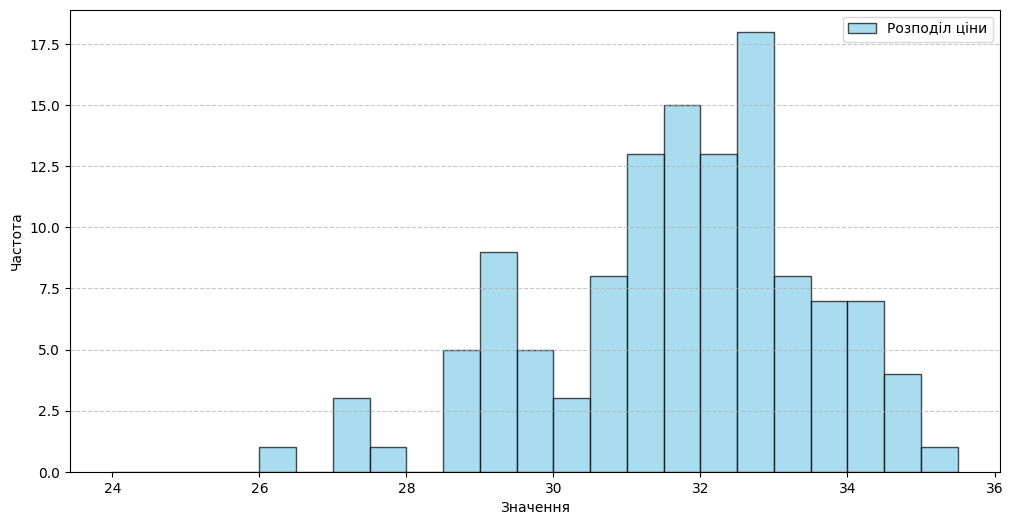

In [5]:
plt.figure(figsize=(12, 6))

plt.hist(r, bins=bins, color='skyblue', edgecolor='black', alpha=0.7, label="Розподіл ціни")

plt.xlabel('Значення')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Середня кількість Ектоплами: 221.57
Середня кількість руди: 222.64
Середня кількість дерева: 217.88
Собівартість створення одного предмета: 1286.00 монет
Середній прибуток: 31908.10 монет на одну операцію


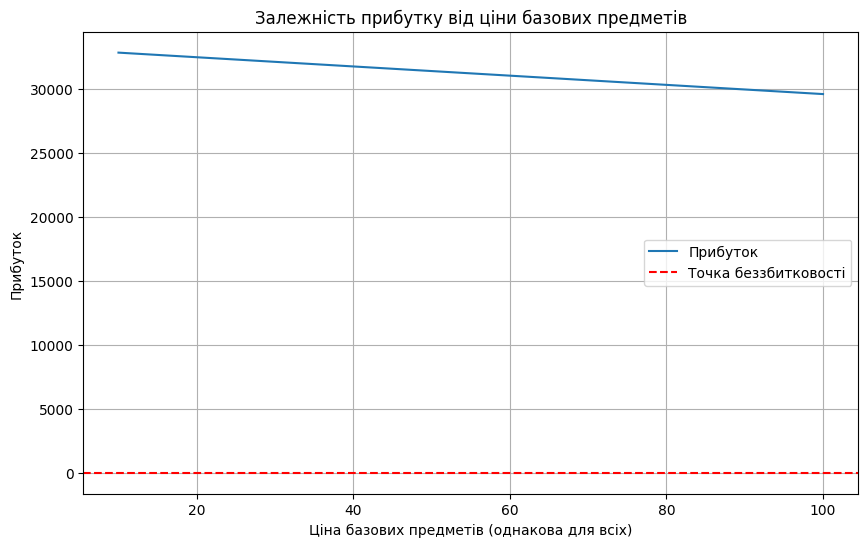

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Задаємо ціни базових предметів
prices_base = np.array([50, 30, 20])  # Ціни: [T6, руда, дерево]
price_ectoplasm = 100  # Ціна Ектоплазми
cost_disassembly = 6  # Вартість розщеплення

# Кількість базових предметів, необхідних для створення одного предмета
resources_required = np.array([15, 11, 10])

# Завантаження даних про результати розщеплення
data = np.loadtxt("data.txt", delimiter="\t")
ectoplasm, ore, wood = data[:, 0], data[:, 1], data[:, 2]

# Розрахунок середньої кількості отриманих предметів
avg_ectoplasm = np.mean(ectoplasm)
avg_ore = np.mean(ore)
avg_wood = np.mean(wood)

# Розрахунок середньої виручки
avg_revenue = avg_ectoplasm * price_ectoplasm + avg_ore * prices_base[1] + avg_wood * prices_base[2]

# Розрахунок собівартості
cost_per_item = np.sum(resources_required * prices_base) + cost_disassembly

# Розрахунок прибутку
profit = avg_revenue - cost_per_item

# Виведення результатів
print(f"Середня кількість Ектоплами: {avg_ectoplasm:.2f}")
print(f"Середня кількість руди: {avg_ore:.2f}")
print(f"Середня кількість дерева: {avg_wood:.2f}")
print(f"Собівартість створення одного предмета: {cost_per_item:.2f} монет")
print(f"Середній прибуток: {profit:.2f} монет на одну операцію")

# Візуалізація залежності прибутку від ціни базових предметів
prices_variation = np.linspace(10, 100, 50)  # Варіюємо ціну базових предметів
profits = []

for price in prices_variation:
    temp_prices = np.array([price, price, price])
    temp_cost = np.sum(resources_required * temp_prices) + cost_disassembly
    temp_profit = avg_revenue - temp_cost
    profits.append(temp_profit)

plt.figure(figsize=(10, 6))
plt.plot(prices_variation, profits, label="Прибуток")
plt.axhline(0, color='red', linestyle='--', label="Точка беззбитковості")
plt.xlabel("Ціна базових предметів (однакова для всіх)")
plt.ylabel("Прибуток")
plt.title("Залежність прибутку від ціни базових предметів")
plt.legend()
plt.grid()
plt.show()
